# **Clustering Algorithms Demonstration**

Clustering is a fundamental technique in machine learning and data analysis that involves grouping similar data points together based on intrinsic patterns or features, without prior knowledge of specific categories. By identifying inherent structures within datasets, clustering algorithms reveal meaningful relationships and dependencies, providing valuable insights into the underlying organization of the data. Unlike supervised learning methods, clustering operates in an unsupervised manner, making it particularly useful for exploring datasets where the labels or groupings are unknown. Common applications of clustering span a wide range of domains, from customer segmentation in marketing to image segmentation in computer vision, showcasing its versatility in uncovering hidden structures within diverse datasets. As a key component of unsupervised learning, clustering plays a pivotal role in organizing and simplifying complex datasets, aiding researchers and analysts in making sense of intricate patterns and relationships.

In this notebook all 10 scikit-learn clustering methods ( available right [here](https://scikit-learn.org/stable/modules/classes.html) ) will be explained and applied over this exercise [dataset](https://www.kaggle.com/datasets/joonasyoon/clustering-exercises?select=basic3.csv).

## Loading Dataset

### Libraries used

In [1]:
import sys
import pandas as pd

sys.path.append('../src')

# %matplotlib inline
from graphic import Graphic
from modeller import Modeller

sys.path.remove('../src')

### Loading

Loading every single csv file in `dataset` folder as a `pandas.DataFrame` into the dictionary `dataframes`

In [2]:
base_path = '../dataset/'

files = [
    'basic1', 'basic2', 'basic3', 'basic4', 'basic5', 'blob',
    'box', 'boxes', 'boxes2', 'boxes3', 'chrome', 'dart',
    'dart2', 'face', 'hyperplane', 'isolation', 'lines', 'lines2',
    'network', 'outliers', 'ring', 'sparse', 'spiral', 'spiral2',
    'spirals', 'supernova', 'triangle', 'un', 'un2', 'wave',        
]

dataframes = {}
for file in files:
    dataframes[file] = pd.read_csv(base_path + file + '.csv')
    
    # This is necessary because it must exist a 'labels'
    # key in df, for Graphic methods to work
    dataframes[file]['labels'] = dataframes[file]['color']
    del dataframes[file]['color']


# Initializing the Graphic class
g = Graphic()

## Visualizing Data

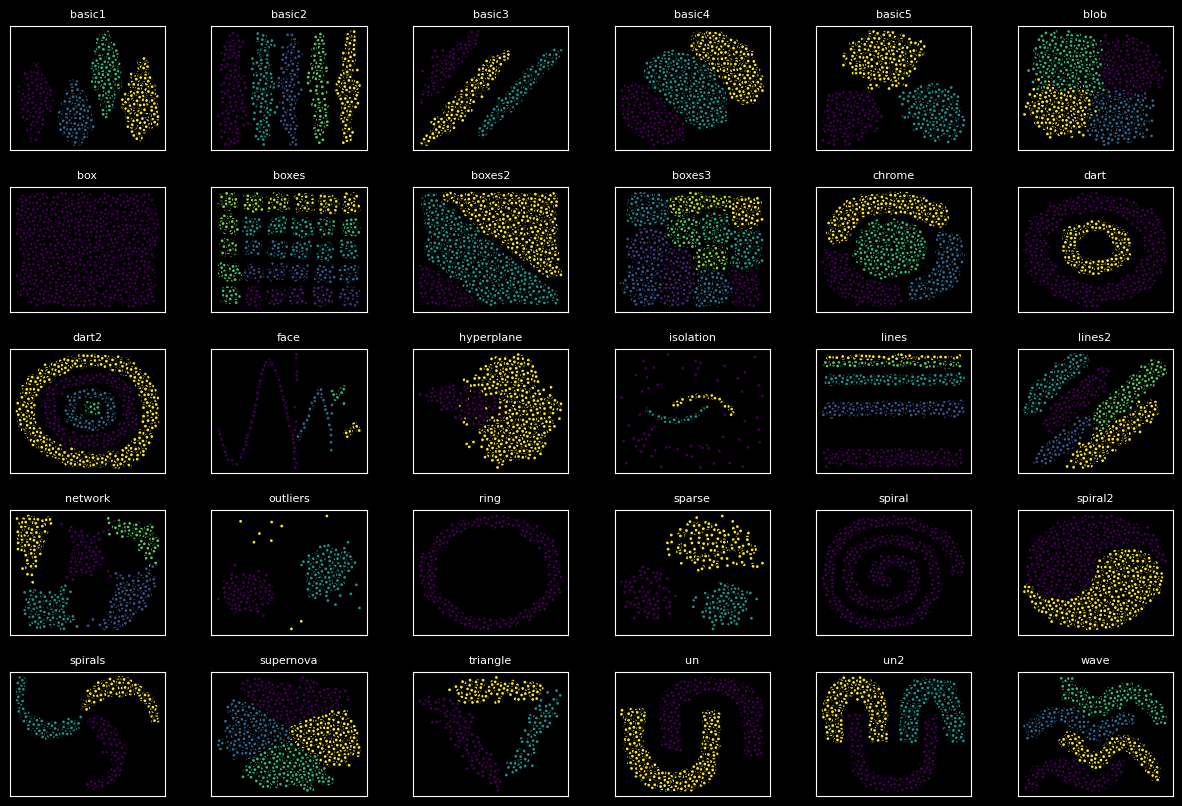

In [3]:
g.sample_many(dataframes=dataframes, nrows=5, ncols=6)

Here is possible to visualize what every single one of the samples looks like. It is also possible to notice that the `face` sample has gone rogue. This is due to an extra dimension in the data frame. It is also valid to notice that the same concept applies to the `hyperplane` sample, where a dimensionality reduction will be needed for future 2-dimensional or 3-dimensional visualizations. In fact, the great majority of data mining processes and products are applied over n-dimensional spaces, due to the high number of attributes extracted.

Below there is the correct 2-dimensional visualization of `face` sample:

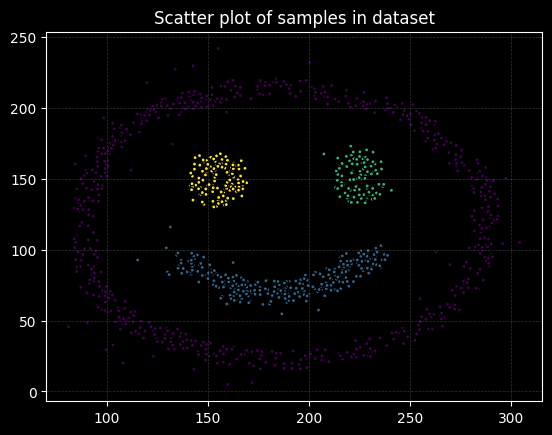

In [4]:
face = dataframes['face'].drop(dataframes['face'].columns[0], axis=1)
g.sample(face, face['labels'])

## K-Means

The `K-Means` algorithm ( aka. `Lloyd's` algorithm ) is a representative-based Clustering technique. It works by finding `k` groups, each one with a representative point that summarized the cluster, called `centroid`. The `Lloyd's` algorithm ( which is a subset of all `K-Means` techniques ), finds the `centroids` by making a mean of all the points in the cluster:

$$\Large \mu_i = \frac{1}{n_i} \sum_{x_j \in C_i}x_j$$

Let a Clustering $C$ be a set of clusters $C = { C_0, C_1, ... C_n }$. To evaluate it's goodness it is used the Sum of Squared Errors ( `SSE` ) scoring function:

$$\Large SSE(C) = \sum_{i = 1}^{k} \sum_{x_j \in C_i} || x_j - \mu_i||^2$$

The goal is to find the clustering $C$ that minimizes the SSE score:

$$\Large C^* = \argmin_{C}( SSE(C) )$$

`K-means` employs a greedy iterative approach to find a clustering that minimizes the SSE objective. However, it can converge to a local optimum instead of a globally optimal clustering. `K-means` initializes the cluster means by randomly generating `k` points in the data space. This is typically done by generating a value uniformly at random within the range for each dimension. Each iteration of `K-means` consists of two steps: (1) cluster assignment, and (2) centroid update. Given the `k` cluster means, in the cluster assignment step, each point $x_j \in D$ is assigned to the closest mean, which induces a clustering, with each cluster $C_i$ comprising points that are closer to $\mu_i$​ than any other cluster mean. In other words, each point $x_j$​ is assigned to cluster $C_{i^∗}$​, where $i^*$ is the index of the closest `centroid`.

It has complexity $O(t n k d)$, being `t` each iteration, `n * k * d` the number of calculations between every point `n` to every `centroid k ` in every dimension `d`.

`K-Means` is one of the fastest clustering algorithms available, but it's main drawback is the inability of correctly clustering non linear separable datasets. Other disadvantages of using `K-Means` is that it forces samples to make part of a clustering, and thus, is vulnerable to outliers. The first drawback ( linear separability restricted ), can be largely solved by using `Kernel` methods, transfering the input space to high-dimensional feature spaces. This will be demonstrated later.


In [3]:
samples_to_use = [('basic1', 4), ('basic2', 5), ('basic4', 3), ('dart2', 4), ('triangle', 3)]
model = Modeller()

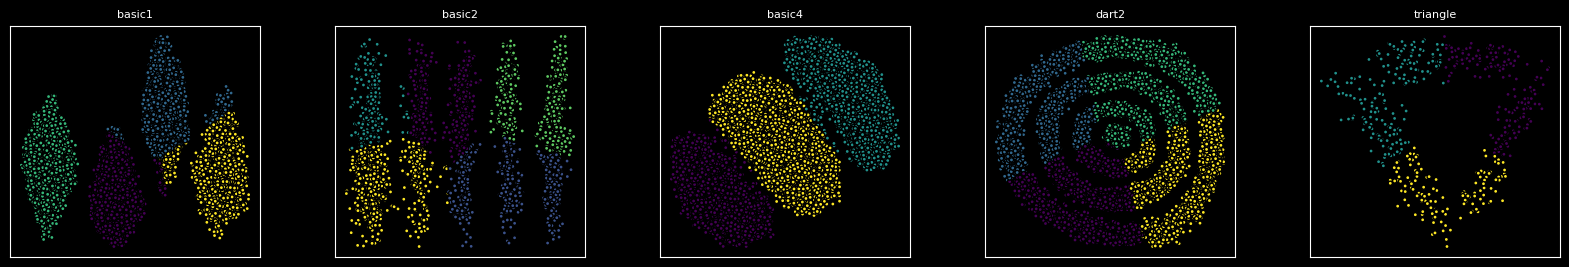

In [10]:
buffer = {}
labels = {}
for sample, k in samples_to_use:
    buffer[sample], labels[sample], _ = model.kmeans(dataframes[sample], k, sample)

g.sample_many(buffer, nrows=1, ncols=5, figsize=(20, 3))

## Gaussian Mixture ( Gaussian Kernel for K-Means )

As it was sad before, the linear `K-Means` isn't capable of correctly clustering non linear separable samples. This can be spotted on `dart2` sample above. It is also valid to mention, that a linear separable sample may not be well clusterized as `basic2` and `triangle` show above. This happens, because the centroids try to minimize its distance to every single point in the cluster. Thus, every close stratches in the sample, will have it's ends further from the `centroid` than the points in the adjacent stratch.

However, such problem can be circumvented with the adoption of the `Kernel` method, utilizing a gaussian distribution, instead of the eucliadean distance. The $SSE$ is defined by:

$$\Large SSE(C) = \sum_{j = 1}^{n} K(x_j, x_j) - \sum_{i = 1}^{k} \frac{1}{n_i} \sum_{x_a \in C_i} \sum_{x_b \in C_i} K(x_a, x_b)$$

And to find $C^*$:

$$\Large C^*(x_j) = \argmin_{i} (  \frac{1}{n^2} \sum_{x_a \in C_i} \sum_{x_b \in C_i} K(x_a, x_b) - \frac{2}{n_i} \sum_{x_a \in C_i} K(x_a, x_j)  )$$

To demonstrate the gaussian kernel, it will be used the `GaussianMixture` class from `sklearn`.

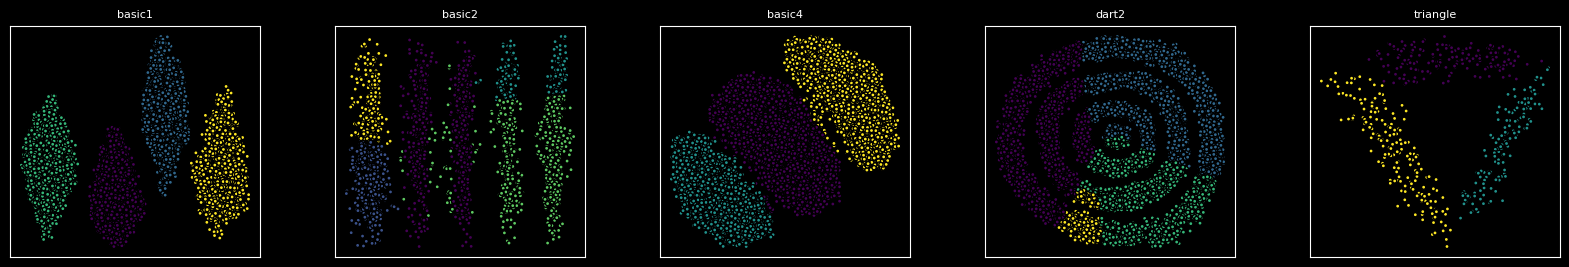

In [21]:
buffer = {}
labels = {}
for sample, k in samples_to_use:
    buffer[sample], labels[sample], _ = model.gmixture(dataframes[sample], k, sample)

g.sample_many(buffer, nrows=1, ncols=5, figsize=(20, 3))

It stills lack some predictability capacity, but it is way more robust than the `Lloyd's` algorithm in instances `basic1` and `triangle`. It is also possible to evaluate its capacity to make clusters out os linear groups of samples, as demonstrated in examples `basic2` and `triangle`.

## Bisecting K-Means

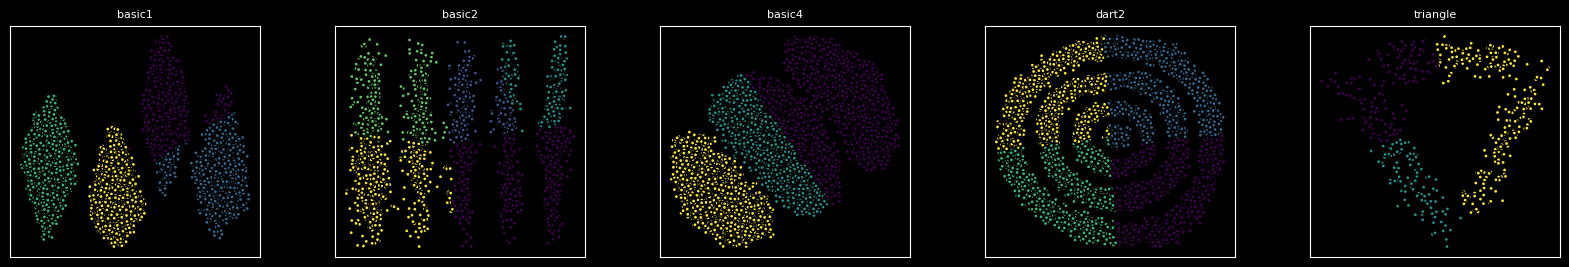

In [4]:
buffer = {}
labels = {}
for sample, k in samples_to_use:
    buffer[sample], labels[sample], _ = model.bskmeans(dataframes[sample], k, sample)

g.sample_many(buffer, nrows=1, ncols=5, figsize=(20, 3))

## DBSCAN

In [47]:
samples_to_use = [('basic1', 14.5), ('basic2', 18.8), ('basic4', 9.5), ('dart2', 9.5), ('triangle', 14.5)]

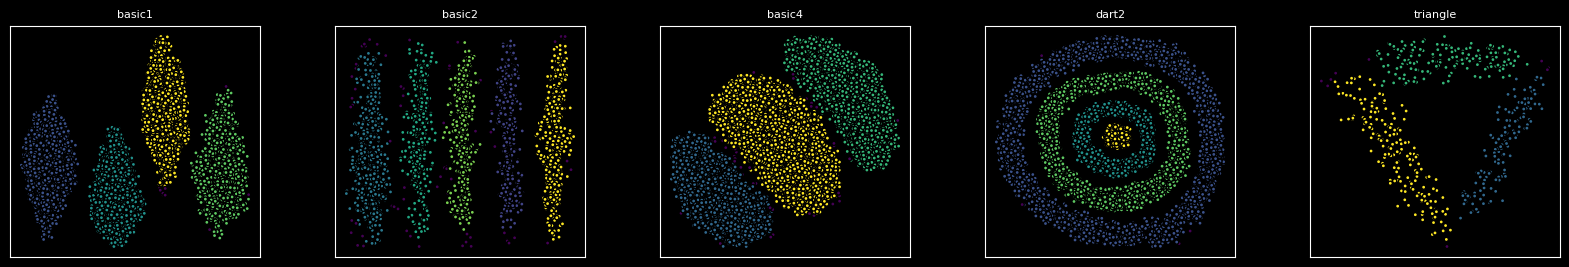

In [48]:
buffer = {}
labels = {}
for sample, eps in samples_to_use:
    buffer[sample], labels[sample], _ = model.dbscan(dataframes[sample], eps, sample)

g.sample_many(buffer, nrows=1, ncols=5, figsize=(20, 3))

## HDBSCAN

## Affinity Propagation

## Agglomerative Clustering

## Feature Agglomeration

## Birch

### _Mini Batch K-Means_

## Mean Shift

## OPTICS

## Spectral Clustering

### _Spectral Biclustering_

### _Spectral Coclustering_

## Dimensional Reduction & Algorithmic Comparisons